# Jupyter print all

In [1]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Read data

In [3]:
canada = pd.read_csv('clean_data/cleaned-canada-covid.csv', parse_dates=['date'])
canada.columns
canada.info()
canada.head()


Index(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'people_vaccinated', 'people_vaccinated_per_hundred'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   iso_code                       683 non-null    object        
 1   date                           683 non-null    datetime64[ns]
 2   total_cases                    683 non-null    float64       
 3   new_cases                      683 non-null    float64       
 4   total_deaths                   640 non-null    float64       
 5   new_deaths                     640 non-null    float64       
 6   total_cases_per_million        683 non-null    float64       
 7   new_cases_per_million          683 non-null    float64       
 8   total_deaths_per_million       640 non-null    float64       
 9   new_deaths_per_million         640 non-null    float64       
 10  people_vaccinated              360 non-null    float64       
 11  people_vaccinated_p

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
0,CAN,2020-01-26,1.0,1.0,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN
1,CAN,2020-01-27,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN
2,CAN,2020-01-28,2.0,1.0,NaN,NaN,0.053,0.026,NaN,NaN,NaN,NaN
3,CAN,2020-01-29,2.0,0.0,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN
4,CAN,2020-01-30,2.0,0.0,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN


In [4]:
canada_no_vaccine = canada[canada['people_vaccinated'].isna()]
canada_no_vaccine
canada_vaccine = canada[canada['people_vaccinated'] > 0]
canada_vaccine


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
0,CAN,2020-01-26,1.0,1.0,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN
1,CAN,2020-01-27,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN
2,CAN,2020-01-28,2.0,1.0,NaN,NaN,0.053,0.026,NaN,NaN,NaN,NaN
3,CAN,2020-01-29,2.0,0.0,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN
4,CAN,2020-01-30,2.0,0.0,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
318,CAN,2020-12-09,440737.0,6417.0,13109.0,116.0,11577.651,168.567,344.358,3.047,NaN,NaN
319,CAN,2020-12-10,447341.0,6604.0,13227.0,118.0,11751.130,173.479,347.458,3.100,NaN,NaN
320,CAN,2020-12-11,454254.0,6913.0,13355.0,128.0,11932.727,181.597,350.820,3.362,NaN,NaN
321,CAN,2020-12-12,460332.0,6078.0,13453.0,98.0,12092.389,159.662,353.395,2.574,NaN,NaN


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
323,CAN,2020-12-14,474661.0,8645.0,13677.0,140.0,12468.795,227.094,359.279,3.678,5.0,0.00
324,CAN,2020-12-15,480952.0,6291.0,13793.0,116.0,12634.052,165.257,362.326,3.047,727.0,0.00
325,CAN,2020-12-16,487685.0,6733.0,13911.0,118.0,12810.920,176.868,365.426,3.100,3016.0,0.01
326,CAN,2020-12-17,495152.0,7467.0,14067.0,156.0,13007.070,196.149,369.524,4.098,7267.0,0.02
327,CAN,2020-12-18,502197.0,7045.0,14180.0,113.0,13192.134,185.064,372.492,2.968,11276.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
678,CAN,2021-12-04,1813304.0,2479.0,29819.0,8.0,47633.397,65.120,783.311,0.210,30755662.0,80.79
679,CAN,2021-12-05,1815686.0,2382.0,29821.0,2.0,47695.969,62.572,783.363,0.053,30815618.0,80.95
680,CAN,2021-12-06,1820693.0,5007.0,29854.0,33.0,47827.497,131.528,784.230,0.867,30916886.0,81.22
681,CAN,2021-12-07,1823674.0,2981.0,29880.0,26.0,47905.805,78.307,784.913,0.683,30976960.0,81.37


# Find best normal distribution

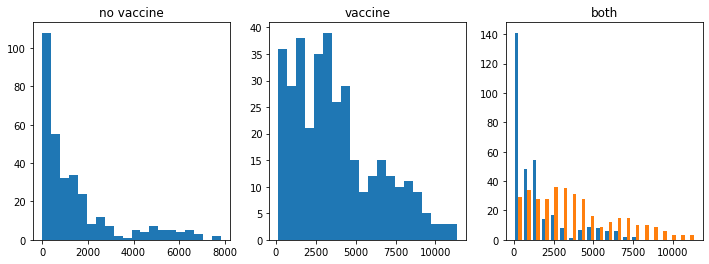

Unable to do np.log since 0 values.
Unable to do np.exp since 0 values.


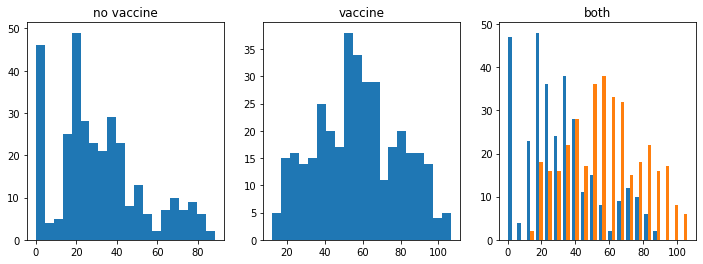

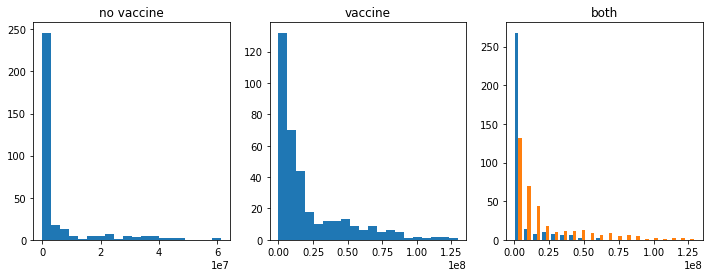

In [5]:
_ = plt.figure(figsize=(12, 4))
_ = plt.subplot(1, 3, 1)
_ = plt.title('no vaccine')
_ = plt.hist(canada_no_vaccine['new_cases'], bins=20)
_ = plt.subplot(1, 3, 2)
_ = plt.title('vaccine')
_ = plt.hist(canada_vaccine['new_cases'], bins=20)
_ = plt.subplot(1, 3, 3)
_ = plt.title('both')
_ = plt.hist([canada_no_vaccine['new_cases'], canada_vaccine['new_cases']], bins=20)
plt.show()

# _ = plt.figure(figsize=(12, 4))
# _ = plt.subplot(1, 3, 1)
# _ = plt.title('no vaccine')
# _ = plt.hist(np.log(canada_no_vaccine['new_cases']), bins=20)
# _ = plt.subplot(1, 3, 2)
# _ = plt.title('vaccine')
# _ = plt.hist(np.log(canada_vaccine['new_cases']), bins=20)
# _ = plt.subplot(1, 3, 3)
# _ = plt.title('both')
# _ = plt.hist([np.log(canada_no_vaccine['new_cases']), np.log(canada_vaccine['new_cases'])], bins=20)
# plt.show()
print('Unable to do np.log since 0 values.')

# _ = plt.figure(figsize=(12, 4))
# _ = plt.subplot(1, 3, 1)
# _ = plt.title('no vaccine')
# _ = plt.hist(np.exp(canada_no_vaccine['new_cases']), bins=20)
# _ = plt.subplot(1, 3, 2)
# _ = plt.title('vaccine')
# _ = plt.hist(np.exp(canada_vaccine['new_cases']), bins=20)
# _ = plt.subplot(1, 3, 3)
# _ = plt.title('both')
# _ = plt.hist([np.exp(canada_no_vaccine['new_cases']), np.exp(canada_vaccine['new_cases'])], bins=20)
# plt.show()
print('Unable to do np.exp since 0 values.')

_ = plt.figure(figsize=(12, 4))
_ = plt.subplot(1, 3, 1)
_ = plt.title('no vaccine')
_ = plt.hist(np.sqrt(canada_no_vaccine['new_cases']), bins=20)
_ = plt.subplot(1, 3, 2)
_ = plt.title('vaccine')
_ = plt.hist(np.sqrt(canada_vaccine['new_cases']), bins=20)
_ = plt.subplot(1, 3, 3)
_ = plt.title('both')
_ = plt.hist([np.sqrt(canada_no_vaccine['new_cases']), np.sqrt(canada_vaccine['new_cases'])], bins=20)
plt.show()

_ = plt.figure(figsize=(12, 4))
_ = plt.subplot(1, 3, 1)
_ = plt.title('no vaccine')
_ = plt.hist(canada_no_vaccine['new_cases'] ** 2, bins=20)
_ = plt.subplot(1, 3, 2)
_ = plt.title('vaccine')
_ = plt.hist(canada_vaccine['new_cases'] ** 2, bins=20)
_ = plt.subplot(1, 3, 3)
_ = plt.title('both')
_ = plt.hist([canada_no_vaccine['new_cases'] ** 2, canada_vaccine['new_cases'] ** 2], bins=20)
plt.show()


Sqrt give most normal distribution.

# ANOVA test

In [14]:
anova = stats.f_oneway(
    canada_no_vaccine['new_cases'], canada_vaccine['new_cases'])

print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


Is there a difference between means? yes


# Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
no_vaccine,vaccine,2338.6788,0.001,1998.5973,2678.7602,True


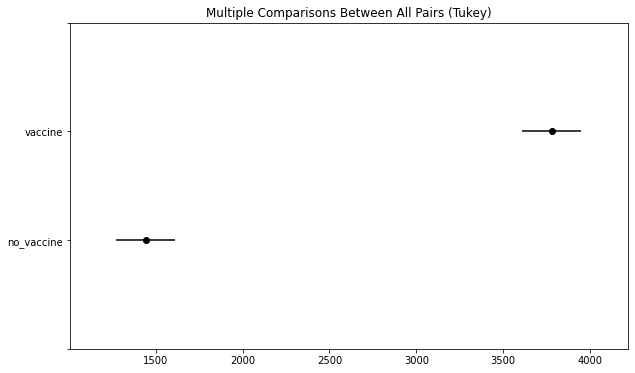

In [25]:
x_data = pd.DataFrame({'no_vaccine': canada_no_vaccine['new_cases'], 'vaccine': canada_vaccine['new_cases']})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


# Discussion

Above graph shows number mean number of cases per day is higher while there was a vaccine than without. There are a couple reasons this could be the case. There was no vaccine earlier in the pandemic, so it was likely that lockdowns were more strict and people were more hesitant to go out. As the vaccine started to roll out, restrictions would get lifted and case number would increase; however, there should be less deaths as more people will test positive, but have less severe symptoms.